## Intercept over Union (Jaccard index)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

A box here is defined as `x,y` of center and `w,h` of edges

In [65]:
def intercept(box1, box2):
    'calculate the IoU'
    x1,y1,w1,h1 = box1
    x2,y2,w2,h2 = box2
    
    if (abs(x1-x2) >= w1/2+w2/2) or (abs(y1-y2) >= h1/2+h2/2):
        # no intercept
        return 0
    else:
        # find left x
        if (x1-w1/2 > x2-w2/2):
            xl = x1-w1/2
        else:
            xl = x2-w2/2
        # find right x
        if (x1+w1/2 > x2+w2/2):
            xr = x2+w2/2
        else:
            xr = x1+w1/2
        # find bottom y
        if (y1-h1/2 > y2-h2/2):
            yb = y1-h1/2
        else:
            yb = y2-h2/2
        # find top y
        if (y1+h1/2 > y2+h2/2):
            yt = y2+h2/2
        else:
            yt = y1+h1/2  
        # intercept over union
        i = (xr-xl)*(yt-yb)
        return i / (w1*h1 + w2*h2 - i)

### Example

In [66]:
# Helper method
def draw_box(box):
    'draw a rectangle in pyplot'
    x,y,w,h = box
    bl = [x-w/2,y-h/2]
    br = [x+w/2,y-h/2]
    tl = [x-w/2,y+h/2]
    tr = [x+w/2,y+h/2]
    plt.plot([bl[0],br[0],tr[0],tl[0],bl[0]],[bl[1],br[1],tr[1],tl[1],bl[1]])  

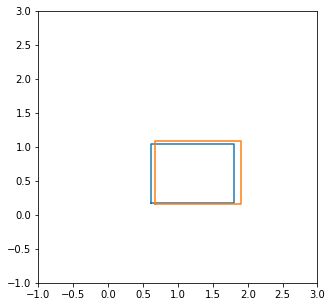

0.7964717545113479

In [120]:
# generate two random boxes
r = np.random.random(size=8)+0.5
box1 = [r[0],r[1],r[2],r[3]]
box2 = [r[4],r[5],r[6],r[7]]

# draw boxes
plt.figure(figsize=(5,5))
draw_box(box1)
draw_box(box2)
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.show()

# calculate IoU
intercept(box1,box2)